In [1]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:10<00:00, 206MB/s]
100% 812M/812M [00:10<00:00, 84.5MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [7]:
from zipfile import ZipFile
dataset='/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [8]:
import os
# counting the no of file in train folder

path,dirs,files=next(os.walk('/content/train'))

files_count=len(files)

print(f"The number of images : {files_count}")

The number of images : 25000


In [9]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.3064.jpg', 'cat.3688.jpg', 'dog.4892.jpg', 'cat.7573.jpg', 'dog.8655.jpg', 'dog.5038.jpg', 'dog.5451.jpg', 'cat.2345.jpg', 'cat.10546.jpg', 'cat.9369.jpg', 'cat.8987.jpg', 'dog.9452.jpg', 'cat.10262.jpg', 'cat.2435.jpg', 'cat.11646.jpg', 'dog.8405.jpg', 'cat.10893.jpg', 'cat.9508.jpg', 'cat.10939.jpg', 'dog.5727.jpg', 'dog.2026.jpg', 'dog.4437.jpg', 'dog.7815.jpg', 'cat.1507.jpg', 'dog.11401.jpg', 'dog.8727.jpg', 'cat.2611.jpg', 'dog.3536.jpg', 'cat.6135.jpg', 'cat.4514.jpg', 'cat.9527.jpg', 'dog.3963.jpg', 'dog.11112.jpg', 'cat.253.jpg', 'cat.6205.jpg', 'dog.10216.jpg', 'dog.7683.jpg', 'dog.5360.jpg', 'dog.10353.jpg', 'cat.3374.jpg', 'dog.1345.jpg', 'cat.6284.jpg', 'cat.3034.jpg', 'dog.9851.jpg', 'cat.9301.jpg', 'dog.10129.jpg', 'dog.5487.jpg', 'cat.8453.jpg', 'cat.1674.jpg', 'cat.3647.jpg', 'dog.2315.jpg', 'dog.11206.jpg', 'cat.10691.jpg', 'cat.5443.jpg', 'cat.7461.jpg', 'cat.1398.jpg', 'cat.5953.jpg', 'dog.5875.jpg', 'dog.6499.jpg', 'cat.6915.jpg', 'dog.2234.jpg', 'dog.690.jpg

### Importing the dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

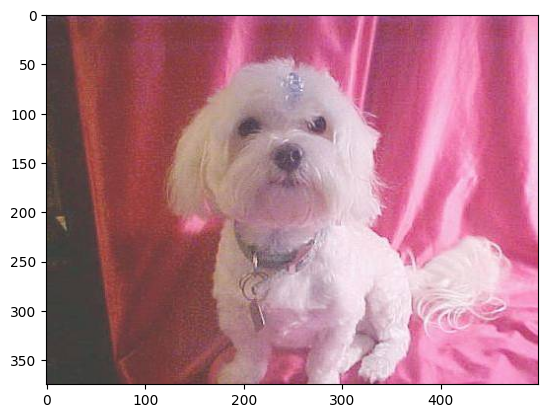

In [28]:
img=mpimg.imread('/content/train/dog.4892.jpg')
imgplt =plt.imshow(img)
plt.show()

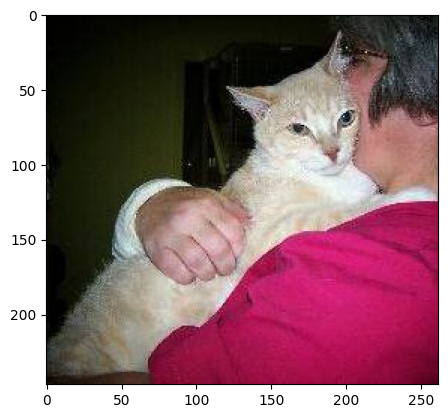

In [30]:
img=mpimg.imread('/content/train/cat.7573.jpg')
imgplt =plt.imshow(img)
plt.show()

In [13]:

file_names=os.listdir('/content/train')

for i in range(5):
  name=file_names[i]
  print(name[0:3])

cat
cat
dog
cat
dog


In [14]:
file_names=os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_names:
  name=img_file[0:3]

  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1

print(f"Dog count : {dog_count}")
print(f"Cat count : {cat_count}")

Dog count : 12500
Cat count : 12500


## Resizing the image


In [15]:
# directory for resized image

os.mkdir('/content/image_resized')

In [16]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'


for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img=Image.open(original_folder+filename)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newimgpah=resized_folder+filename
  img.save(newimgpah)

## Resized dog img

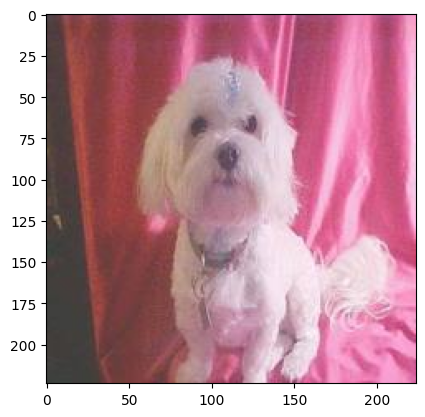

In [29]:
img=mpimg.imread('/content/image_resized/dog.4892.jpg')
imgplt =plt.imshow(img)
plt.show()

 ## Resized cat image

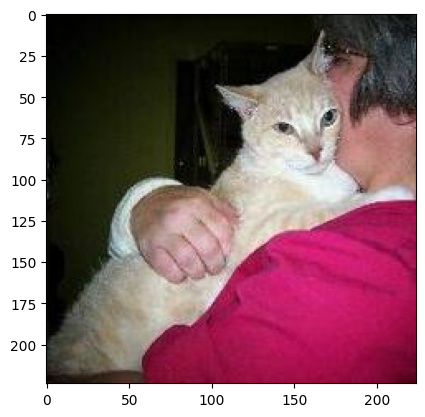

In [31]:
img=mpimg.imread('/content/image_resized/cat.7573.jpg')
imgplt =plt.imshow(img)
plt.show()

## Creating Labels

Dog - 1


cat - 0

In [32]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image_resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [33]:
print(filenames[0:5])
print(labels[0:5])

['cat.3064.jpg', 'cat.3688.jpg', 'dog.4892.jpg', 'cat.7573.jpg', 'dog.8655.jpg']
[0, 0, 1, 0, 1]


In [34]:
print(len(filenames))
print(len(labels))

2000
2000


In [35]:
# Counting images for dogs and cats

values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


## converting img to array

In [36]:
import cv2
import glob

In [37]:
image_directory='/content/image_resized/'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory+'*.'+e )) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [38]:
type(dog_cat_images)

numpy.ndarray

In [39]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [40]:
x=dog_cat_images
y=np.asarray(labels)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(2000, 224, 224, 3)
(1600, 224, 224, 3)
(400, 224, 224, 3)


In [43]:
# scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [44]:
x_train_scaled

array([[[[0.00784314, 0.00392157, 0.01176471],
         [0.01568627, 0.01176471, 0.01960784],
         [0.02352941, 0.01960784, 0.02745098],
         ...,
         [0.81568627, 0.81960784, 0.80392157],
         [0.80784314, 0.81176471, 0.79607843],
         [0.8       , 0.80392157, 0.78823529]],

        [[0.01176471, 0.00784314, 0.01568627],
         [0.01568627, 0.01176471, 0.01960784],
         [0.02352941, 0.01960784, 0.02745098],
         ...,
         [0.81176471, 0.81568627, 0.8       ],
         [0.80784314, 0.81176471, 0.79607843],
         [0.80392157, 0.80784314, 0.79215686]],

        [[0.01960784, 0.01568627, 0.02352941],
         [0.01960784, 0.01568627, 0.02352941],
         [0.01960784, 0.01568627, 0.02352941],
         ...,
         [0.8       , 0.80392157, 0.78823529],
         [0.80784314, 0.81176471, 0.79607843],
         [0.81176471, 0.81568627, 0.8       ]],

        ...,

        [[0.22352941, 0.31764706, 0.38823529],
         [0.21960784, 0.31372549, 0.38431373]

## Neural Network

In [45]:
import tensorflow as tf
import tensorflow_hub as hub

In [46]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [47]:
num_of_classes=2 # types of images(dog,cat)

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [49]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
    )

In [50]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 8s 40ms/step - loss: 0.1900 - acc: 0.9244
Epoch 2/5
50/50 [==============================] - 2s 44ms/step - loss: 0.0597 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 2s 45ms/step - loss: 0.0441 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 2s 46ms/step - loss: 0.0355 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0290 - acc: 0.9937


In [51]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 2s 98ms/step - loss: 0.0765 - acc: 0.9750
Test Loss = 0.07647524029016495
Test Accuracy = 0.9750000238418579


Path of the image to be predicted: /content/dog.jpg


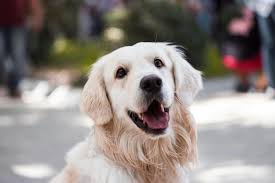

1/1 [==============================] - 1s 1s/step
[[-4.373244   3.3776398]]
1
The image represents a Dog


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/CAT.jpg


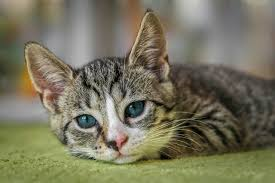

1/1 [==============================] - 0s 21ms/step
[[ 4.1063614 -4.214449 ]]
0
The image represents a Cat


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')